In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import matplotlib.image as mpimg
import cv2
from keras.preprocessing import image

# Visualisation des datas

In [3]:
annotation_path = 'Annotation'
images_path = 'images'

In [4]:
print("Classes contenues dans le dataset :")
print('-' * 35)

classes = []
nb_of_images = []
for name in os.listdir(annotation_path):
    classe = name.split('-')
    nb_of_image = len(os.listdir(annotation_path + '/' + name))
    classes.append(classe[1])
    nb_of_images.append(nb_of_image)
    print(f'{classe[1]}: {nb_of_image} images')

Classes contenues dans le dataset :
-----------------------------------
Chihuahua: 152 images
Japanese_spaniel: 185 images
Maltese_dog: 252 images
Pekinese: 149 images
Shih: 214 images
Blenheim_spaniel: 188 images
papillon: 196 images
toy_terrier: 172 images
Rhodesian_ridgeback: 172 images
Afghan_hound: 239 images
basset: 175 images
beagle: 195 images
bloodhound: 187 images
bluetick: 171 images
black: 159 images
Walker_hound: 153 images
English_foxhound: 157 images
redbone: 148 images
borzoi: 151 images
Irish_wolfhound: 218 images
Italian_greyhound: 182 images
whippet: 187 images
Ibizan_hound: 188 images
Norwegian_elkhound: 196 images
otterhound: 151 images
Saluki: 200 images
Scottish_deerhound: 232 images
Weimaraner: 160 images
Staffordshire_bullterrier: 155 images
American_Staffordshire_terrier: 164 images
Bedlington_terrier: 182 images
Border_terrier: 172 images
Kerry_blue_terrier: 179 images
Irish_terrier: 169 images
Norfolk_terrier: 172 images
Norwich_terrier: 185 images
Yorkshire

In [5]:
print("Classes contenues dans le dataset retenu pour tester les modèles :")
print('-' * 65)

classes_r = []
nb_of_images_r = []
for name in os.listdir(images_path):
    classe = name.split('-')
    nb_of_image = len(os.listdir(images_path + '/' + name))
    classes_r.append(classe[1])
    nb_of_images_r.append(nb_of_image)
    print(f'{classe[1]}: {nb_of_image} images')

Classes contenues dans le dataset retenu pour tester les modèles :
-----------------------------------------------------------------
basset: 175 images
beagle: 195 images
golden_retriever: 150 images
Labrador_retriever: 171 images
German_short: 152 images
French_bulldog: 159 images
Saint_Bernard: 170 images
Siberian_husky: 192 images


In [6]:
df = pd.DataFrame(list(zip(classes, nb_of_images)),columns = ['Classe','images'])


df_r = pd.DataFrame(list(zip(classes_r, nb_of_images_r)),columns = ['Classe','images'])

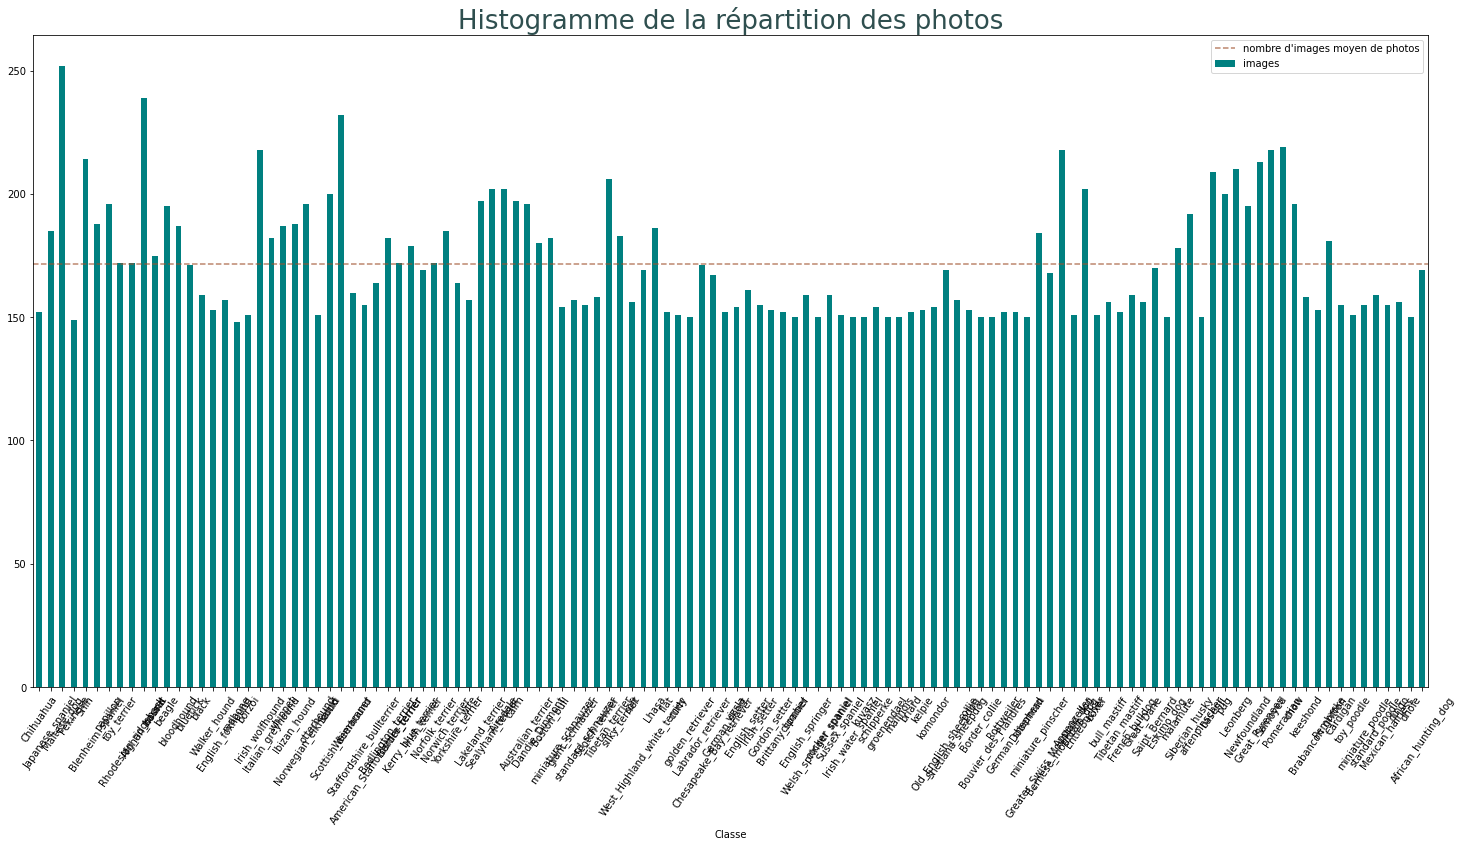

In [7]:
# Visualisation de la database entière


fig, ax = plt.subplots(1, 1, figsize=(25,12))

df.plot.bar(x = 'Classe', y = 'images', rot = 55,ax = ax,color = 'teal')

ax.axhline(df["images"].mean(),
           color='sienna', alpha=.7,
           linestyle='--',
           label="nombre d'images moyen de photos")

plt.title('Histogramme de la répartition des photos',color = 'darkslategray',fontsize = 26)
plt.legend()
plt.show()

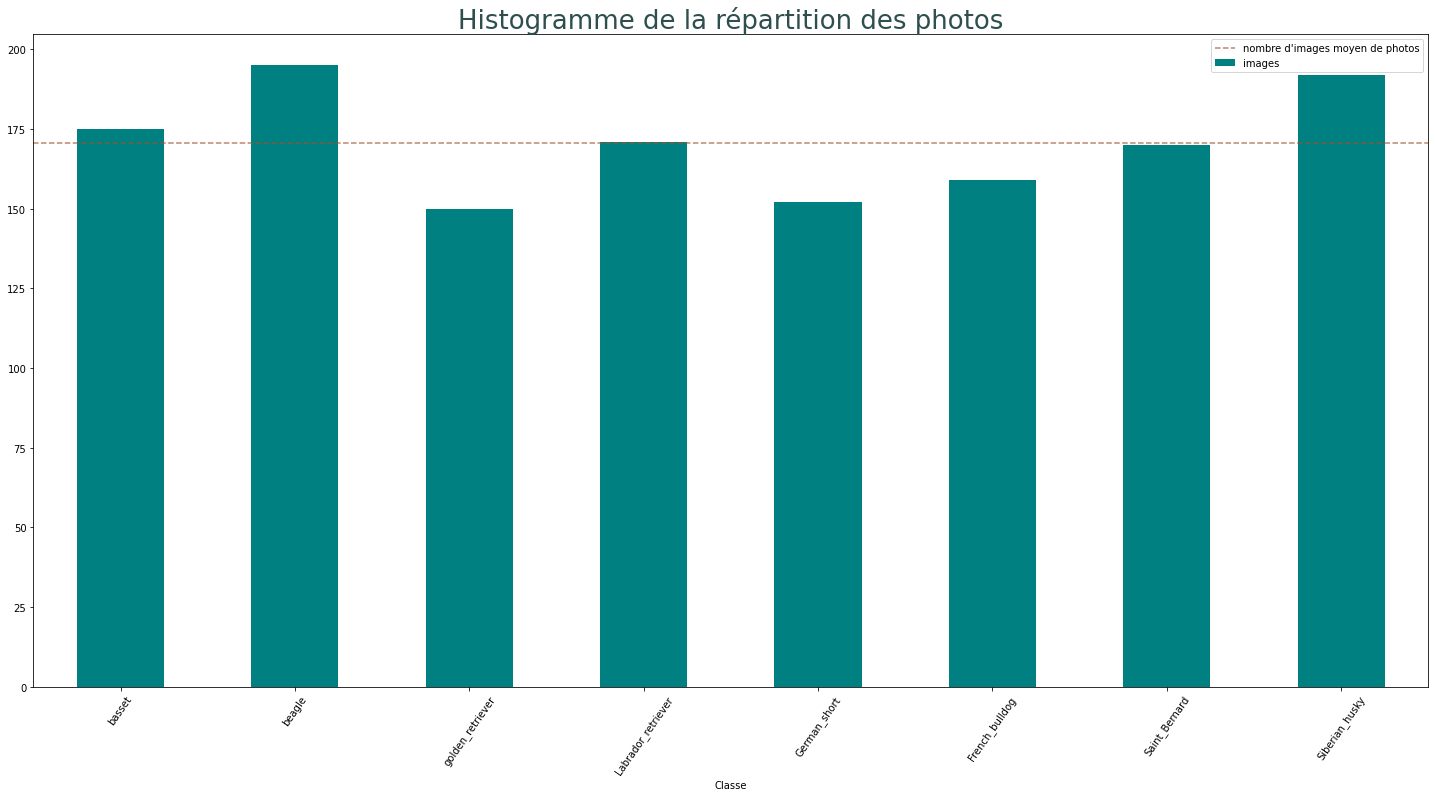

In [8]:
#Visualisation de la database retenue

fig, ax = plt.subplots(1, 1, figsize=(25,12))

df_r.plot.bar(x = 'Classe', y = 'images', rot = 55,ax = ax,color = 'teal')

ax.axhline(df_r["images"].mean(),
           color='sienna', alpha=.7,
           linestyle='--',
           label="nombre d'images moyen de photos")

plt.title('Histogramme de la répartition des photos',color = 'darkslategray',fontsize = 26)
plt.legend()
plt.show()

# Preprocessing des images

In [9]:
#Visualisation de quelques images

'''
show_samples(numsamples = 5,path_image = 'images/', r =5) :

show first numsamples images of the r-th class from the stanford dog dataset

args : 

int numsamples : number of samples to show
str path_image : path of dataset directory
int r : r-th class
'''





def show_samples(numsamples = 5,path_image = 'images/', r =5):
    fig = plt.figure(figsize=(20,20))

    images = os.listdir(path_image)

#     r = random.randint(0,len(images)-1)
    name_img = os.listdir(path_image + images[r])


    legende = images[r].split('-')[1]

    plt.suptitle(f'exemple de race {legende} :',fontsize = 15)

    
    for i in range(numsamples):
            img = mpimg.imread(path_image+images[r]+'/'+name_img[i])
            plt.subplot(numsamples, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

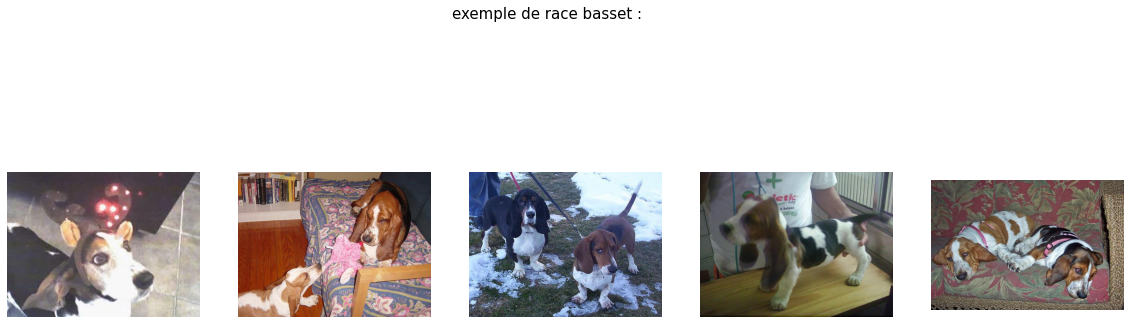

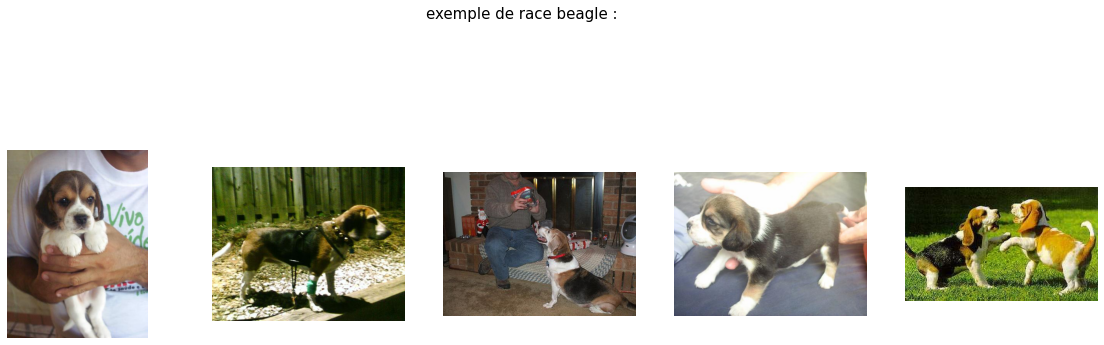

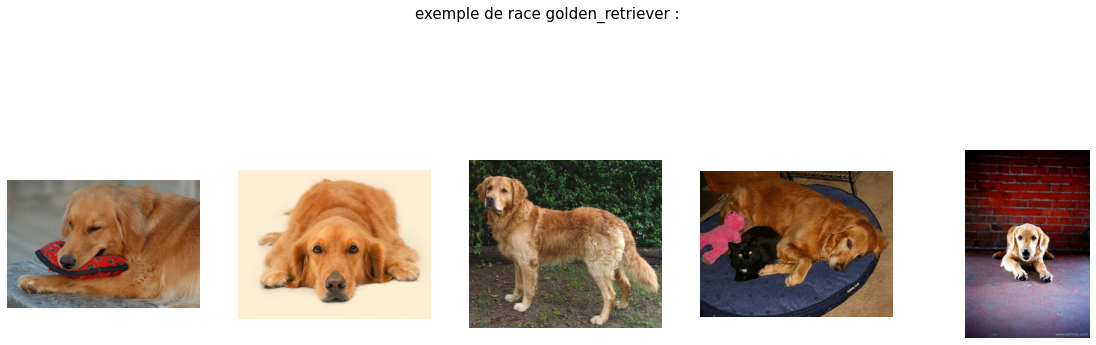

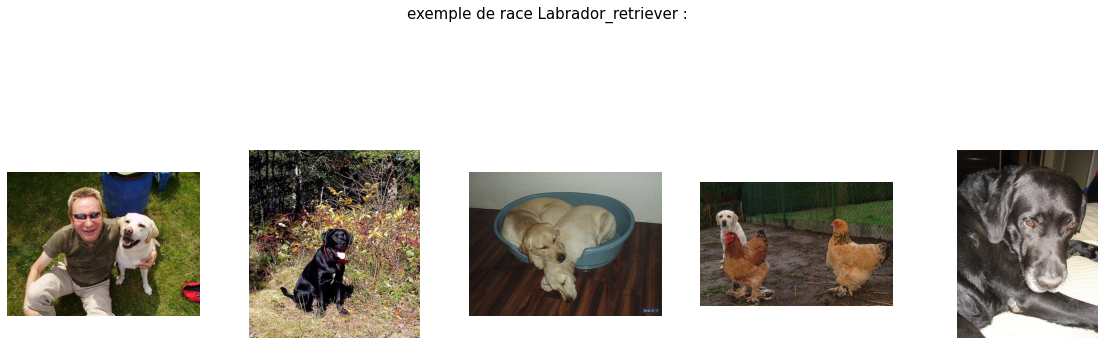

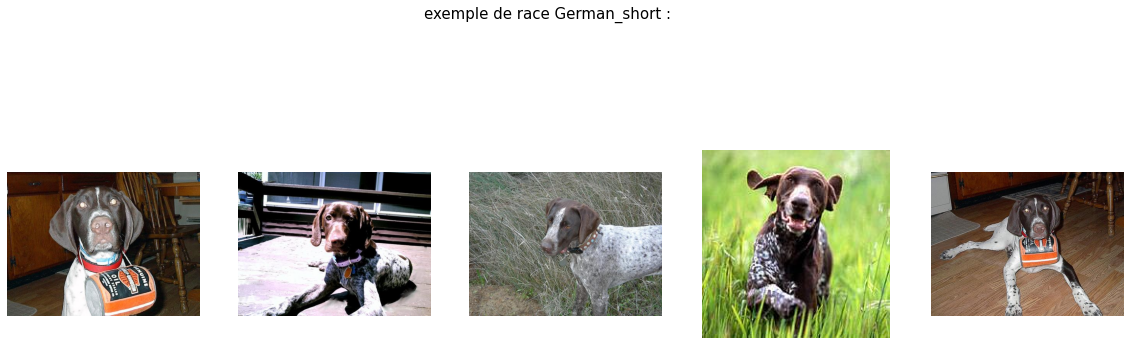

In [10]:
#show samples from the dataset

n_example = 5

for i in range(n_example):
    show_samples(r = i)
    print('\n')

In [11]:
#resize images with opencv

'''
resize_img : resize img with dimensions h and w

int h : height of the image
int width : width of the image
str path_img : path to the image
'''

def resize_img(img,h=224,w=224):
    return cv2.resize(img, (h,w), interpolation=cv2.INTER_LINEAR)

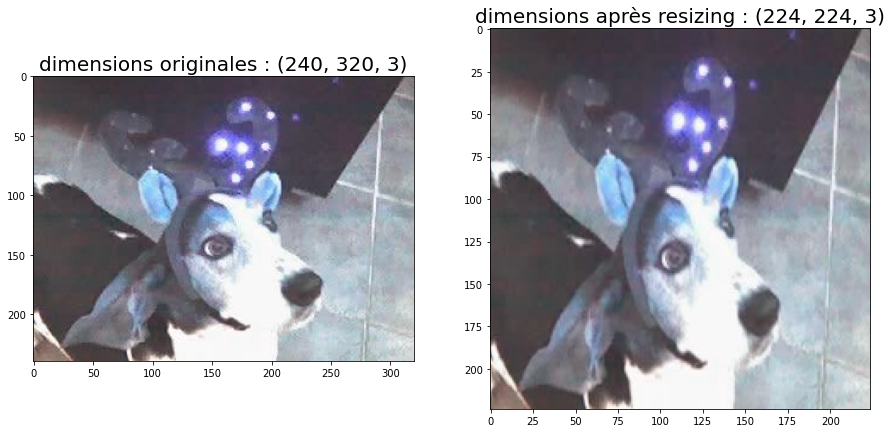

In [12]:
#show resized img

path_img_test = r'images/n02088238-basset/n02088238_10005.jpg'


img_test = cv2.imread(path_img_test)


img_test_resized = resize_img(img_test)

# display images

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title(f'dimensions originales : {np.shape(img_test)}', fontsize = 20)
ax[1].imshow(img_test_resized)
ax[1].set_title(f'dimensions après resizing : {np.shape(img_test_resized)}',fontsize = 20)
plt.show()

# Egalisation d'histogramme

In [13]:
'''
hist_equalizer : performs histogram equalisation on RGB image

str path_img : path to the image
'''

def hist_equalizer(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_out = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
    return img_out 



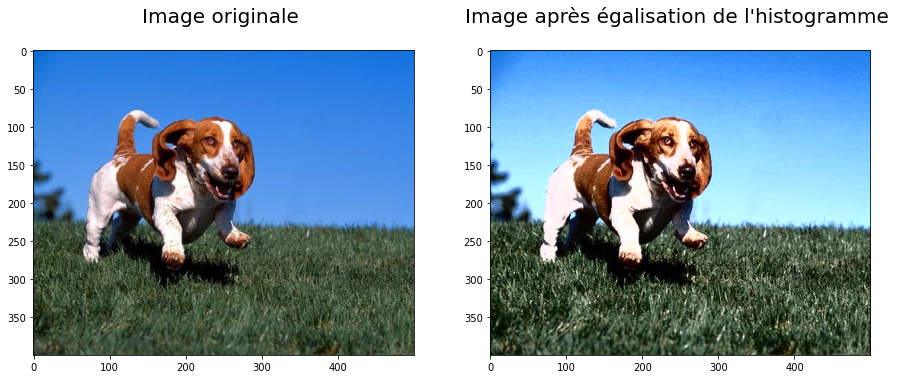

In [14]:
# Show histogram equalisation

path_img_test_2 = r'images/n02088238-basset/n02088238_490.jpg'

img_test = cv2.imread(path_img_test_2)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test_equalized = hist_equalizer(img_test)

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title('Image originale \n', fontsize = 20)
ax[1].imshow(img_test_equalized)
ax[1].set_title('Image après égalisation de l\'histogramme \n',fontsize = 20)
plt.show()

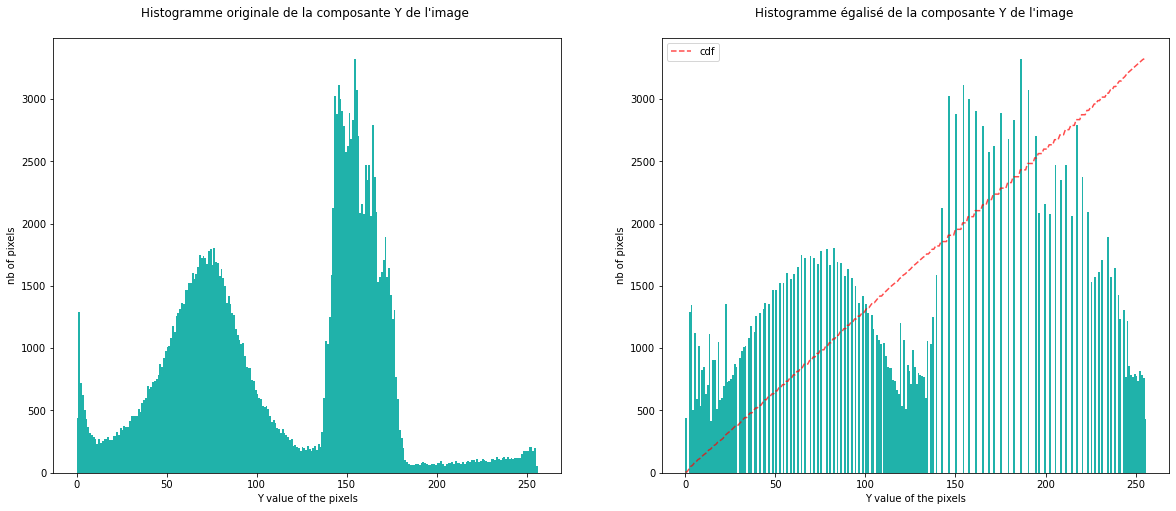

In [15]:
#Show histogram 

img_yuv = cv2.cvtColor(img_test, cv2.COLOR_BGR2YUV)
og_yuv = img_yuv[:,:,0]

eq_yuv = cv2.equalizeHist(og_yuv)


n,m = np.shape(og_yuv)

og_yuv_flat = np.reshape(og_yuv,(n*m))
eq_yuv_flat = np.reshape(eq_yuv,(n*m))




hist, bins = np.histogram(
                    eq_yuv_flat,
                    256, [0,256])

cdf = (np.cumsum(hist))
cdf_n_eq = cdf * float(hist.max()) / cdf.max()




fig, ax = plt.subplots(ncols = 2 , figsize = (20,8))
ax[0].hist(og_yuv_flat,bins = 256,color = 'lightseagreen',range = [0,256])

ax[0].set_title('Histogramme originale de la composante Y de l\'image \n',fontsize = 12)
ax[0].set_ylabel('nb of pixels')
ax[0].set_xlabel('Y value of the pixels')


ax[1].hist(eq_yuv_flat,bins = 256,color = 'lightseagreen',range = [0,256])
ax[1].set_title('Histogramme égalisé de la composante Y de l\'image \n',fontsize = 12)
ax[1].plot(cdf_n_eq, 
             color='r', alpha=.7,
             linestyle='--',label = 'cdf')
ax[1].set_ylabel('nb of pixels')
ax[1].set_xlabel('Y value of the pixels')
ax[1].legend()

plt.show()



# Filtrage

In [16]:
#filtrage gaussien

'''
gaussian filter : apply gaussian filter on RGB image

string path_img : path to the image

return : modified image
'''

def gaussian_filter(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    new_img = cv2.GaussianBlur(img,(3,3),0)
#     img_out = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
    return new_img

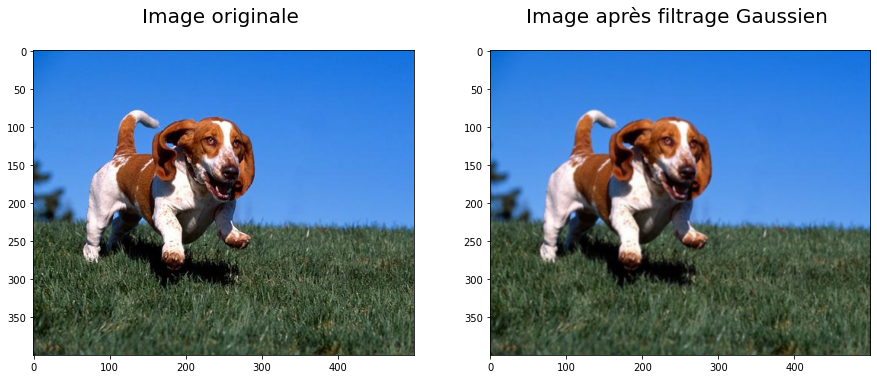

In [19]:
#show gaussian filter effect

path_img_test_2 = r'images/n02088238-basset/n02088238_490.jpg'

img_test = cv2.imread(path_img_test_2)
img_test1 = cv2.imread(path_img_test_2)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
img_test_filtered = gaussian_filter(img_test1)

fig, ax = plt.subplots(ncols = 2 , figsize = (15,15))
ax[0].imshow(img_test)
ax[0].set_title('Image originale \n', fontsize = 20)
ax[1].imshow(img_test_filtered)
ax[1].set_title('Image après filtrage Gaussien \n',fontsize = 20)
plt.show()

# Data augmentation

In [20]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

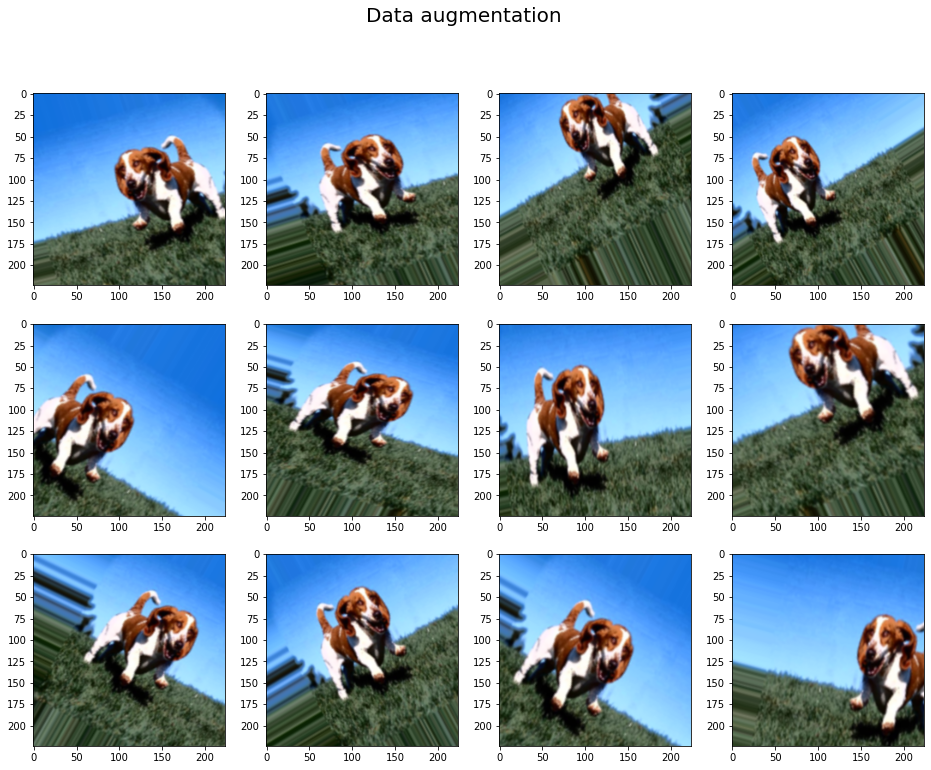

In [21]:
augmented_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Convert test img to array
x = cv2.imread(path_img_test_2)
x = resize_img(x)
x = hist_equalizer(x)
x = gaussian_filter(x)
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
i=0
fig = plt.figure(figsize=(16,12))
for batch in augmented_datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(3,4,i+1)
    ax.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 12 == 0:
        break

plt.suptitle("Data augmentation",
             color="black", 
             fontsize=20)
plt.show()

In [22]:
def preprocessing_cnn(directory):

    img_list=[]
    labels=[]
    for top, dirs, files in os.walk(directory):
        
        for nm in files:       
        
            path_img = os.path.join(top, nm)
            img = cv2.imread(path_img)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      
            
            # Resize image
    
            img = resize_img(img)
        
            # Equalization
            
            img = hist_equalizer(img)
            
            # Apply gaussian filter on img
            
            img = gaussian_filter(img)
            
            # Convert modified img to array
            
            img_array = image.img_to_array(img)
            
            # Append lists of labels and images
            
            img_list.append(np.array(img_array))
            labels.append(top.split("-")[1])
    
    return img_list, labels


In [23]:
# directory

dir_img  = r'images/' 

#X : images
#y : labels

X, y = preprocessing_cnn(dir_img)
# Convert in numpy array
X = np.array(X)
y = np.array(y)

print("-" * 50)

print("Number of images preprocessed : {}"\
     .format(len(y)))
print("Shape of images np.array : {}"\
     .format(X.shape))


--------------------------------------------------
Number of images preprocessed : 1364
Shape of images np.array : (1364, 224, 224, 3)


# Preparation des images preprocessed pour le premier passage dans le reseau de neurones

In [24]:
# Using np.shuffle
img_space = np.arange(X.shape[0])
np.random.seed(8)
# Shuffle the space
np.random.shuffle(img_space)
# Apply to X and y in same order
X = X[img_space]
y = y[img_space]

### encodage des labels

In [25]:
from sklearn.preprocessing import LabelEncoder

# Change X type 
X = X.astype(np.float32)
# Encode y text data in numeric
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

print(encoder.classes_)

['French_bulldog' 'German_short' 'Labrador_retriever' 'Saint_Bernard'
 'Siberian_husky' 'basset' 'beagle' 'golden_retriever']


### Création des datasets de test 

In [26]:
from sklearn.model_selection import train_test_split

### Create train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("-" * 50)
print("Size of created sets :")
print("-" * 50)
print("Train set size = ",x_train.shape[0])
print("Test set size = ",x_test.shape[0])

--------------------------------------------------
Size of created sets :
--------------------------------------------------
Train set size =  1091
Test set size =  273


### Création du ImageDataGenerator pour l'augmentation

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

#For validation and test, just rescale
test_datagen = ImageDataGenerator(rescale=1./255)


# Construction du 1er CNN

In [29]:
from keras import backend as K
import keras_tuner as kt
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import plot_model

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [30]:
#fonctions pour évaluer les métriques des différents CNN


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [31]:
K.clear_session()


In [47]:
model1 = Sequential()

# Ajout de la première couche de convolution, suivie d'une couche ReLU
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape=(224, 224, 3), padding='same'))
model1.add(BatchNormalization(axis=3, scale=False))
model1.add(Activation('relu'))


# Ajout de la première couche de pooling
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2eme couche de convolution 
model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model1.add(BatchNormalization(axis=3, scale=False))
model1.add(Activation('relu'))

#pooling et dropout
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model1.add(Dropout(0.2))

#Global average pooling
model1.add(GlobalAveragePooling2D())

#fully connected layers
model1.add(Dense(128, activation='relu'))
model1.add(Dense(8, activation='softmax'))
# plot_model(model1, to_file='model1_plot.png', 
#            show_shapes=True, show_layer_names=True)

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     96        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     1

In [48]:
# Compile the first model

model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy",f1_m,recall_m])

In [48]:
history = model1.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=20,
    verbose=2)

Epoch 1/20
34/34 - 37s - loss: 1.9713 - accuracy: 0.2333 - f1_m: 6.6579 - recall_m: 3.3626 - val_loss: 2.0621 - val_accuracy: 0.1193 - val_f1_m: 7.2292 - val_recall_m: 3.6146 - 37s/epoch - 1s/step
Epoch 2/20
34/34 - 40s - loss: 1.9712 - accuracy: 0.2260 - f1_m: 6.4700 - recall_m: 3.2549 - val_loss: 2.0402 - val_accuracy: 0.1330 - val_f1_m: 7.2166 - val_recall_m: 3.6083 - 40s/epoch - 1s/step
Epoch 3/20
34/34 - 40s - loss: 1.9521 - accuracy: 0.2315 - f1_m: 6.7636 - recall_m: 3.4293 - val_loss: 2.0709 - val_accuracy: 0.1651 - val_f1_m: 7.4371 - val_recall_m: 3.7186 - 40s/epoch - 1s/step
Epoch 4/20
34/34 - 40s - loss: 1.9438 - accuracy: 0.2568 - f1_m: 6.5110 - recall_m: 3.3034 - val_loss: 2.0304 - val_accuracy: 0.2064 - val_f1_m: 6.8924 - val_recall_m: 3.4462 - 40s/epoch - 1s/step
Epoch 5/20
34/34 - 40s - loss: 1.9379 - accuracy: 0.2550 - f1_m: 6.3578 - recall_m: 3.2056 - val_loss: 2.0763 - val_accuracy: 0.1651 - val_f1_m: 6.7504 - val_recall_m: 3.3752 - 40s/epoch - 1s/step
Epoch 6/20
34/3

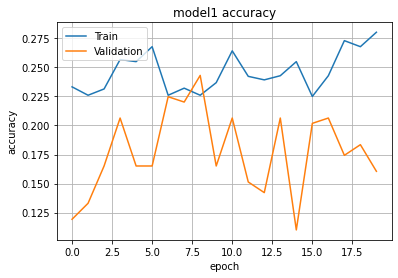

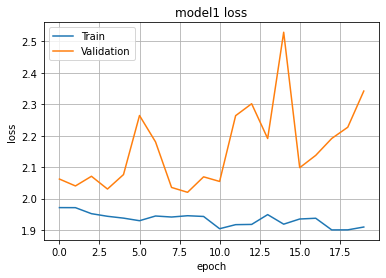

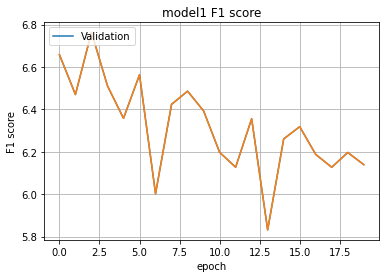

In [53]:
#resultats model1

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for F1 score
plt.plot(history.history['f1_m'])
plt.plot(history.history['f1_m'])
plt.title('model1 F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend(['Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [38]:
# Deuxième modèle de CNN, ajout d'une couche de convolution

model2 = Sequential()

# Ajout de la première couche de convolution, suivie d'une couche ReLU
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape=(224, 224, 3), padding='same'))
model2.add(BatchNormalization(axis=3, scale=False))
model2.add(Activation('relu'))


# Ajout de la première couche de pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2eme couche de convolution 
model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model2.add(BatchNormalization(axis=3, scale=False))
model2.add(Activation('relu'))

#pooling et dropout
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model2.add(Dropout(0.2))

# 3eme couche de convolution 
model2.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model2.add(BatchNormalization(axis=3, scale=False))
model2.add(Activation('relu'))

#pooling et dropout
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model2.add(Dropout(0.2))

#Global average pooling
model2.add(GlobalAveragePooling2D())

#fully connected layers
model2.add(Dense(128, activation='relu'))
model2.add(Dense(8, activation='softmax'))


print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     192       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     9

In [49]:
# Compile the second model

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy",f1_m,recall_m])

In [ ]:
history = model2.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=20,
    verbose=2)

Epoch 1/20
34/34 - 54s - loss: 2.0754 - accuracy: 0.1646 - f1_m: 7.8509 - recall_m: 3.9254 - val_loss: 2.0797 - val_accuracy: 0.0963 - val_f1_m: 8.2716 - val_recall_m: 4.1358 - 54s/epoch - 2s/step
Epoch 2/20
34/34 - 52s - loss: 2.0232 - accuracy: 0.2018 - f1_m: 7.6928 - recall_m: 3.8464 - val_loss: 2.0752 - val_accuracy: 0.0826 - val_f1_m: 8.1702 - val_recall_m: 4.0851 - 52s/epoch - 2s/step
Epoch 3/20
34/34 - 58s - loss: 2.0137 - accuracy: 0.2054 - f1_m: 7.3186 - recall_m: 3.6593 - val_loss: 2.0649 - val_accuracy: 0.2156 - val_f1_m: 8.7348 - val_recall_m: 4.3674 - 58s/epoch - 2s/step
Epoch 4/20
34/34 - 57s - loss: 2.0056 - accuracy: 0.2134 - f1_m: 7.4961 - recall_m: 3.7481 - val_loss: 2.0660 - val_accuracy: 0.1193 - val_f1_m: 8.5844 - val_recall_m: 4.2922 - 57s/epoch - 2s/step
Epoch 5/20


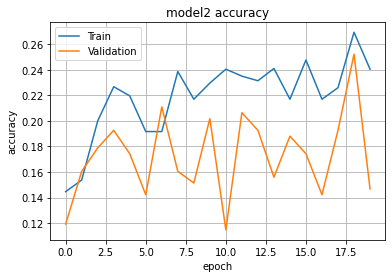

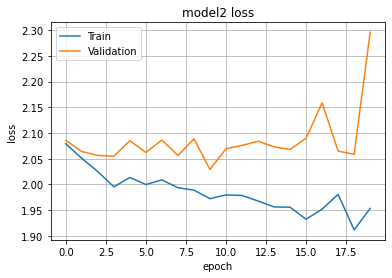

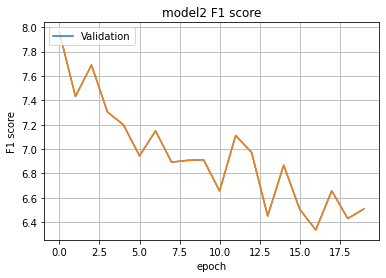

In [59]:
#resultats model2

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for F1 score
plt.plot(history.history['f1_m'])
plt.plot(history.history['f1_m'])
plt.title('model2 F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend(['Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Transfert learning

## Inception Res net V2

In [40]:
K.clear_session()

In [41]:
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    pooling = 'avg',
    weights="imagenet",
    input_shape = (224,224,3),
    classifier_activation="softmax",
)


87924736/87910968 [==============================] - 44s 0us/step


In [42]:
# Add new fully-connected layers
base_output = InceptionV3.output
base_output = Dense(128, activation='relu')(base_output)
base_output = Dropout(0.2)(base_output)
# Output : new classifier
predictions = Dense(8, activation='softmax')(base_output)

# Define new model
myInceptionV3 = Model(inputs=InceptionV3.input,
                       outputs=predictions)


myInceptionV3.compile(optimizer="adam",
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy", f1_m])

In [44]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

#For validation and test, just rescale
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

In [46]:
history_myInceptionV3 = myInceptionV3.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=16,
        subset='validation'),
    steps_per_epoch=len(x_train) / 32,
    epochs=30,
    verbose=2)

Epoch 1/30
34/34 - 128s - loss: 1.1622 - accuracy: 0.5841 - f1_m: 2.5413 - val_loss: 2.8929 - val_accuracy: 0.4220 - val_f1_m: 1.4858 - 128s/epoch - 4s/step
Epoch 2/30
34/34 - 159s - loss: 1.1493 - accuracy: 0.6040 - f1_m: 2.1657 - val_loss: 3.5568 - val_accuracy: 0.3532 - val_f1_m: 1.4358 - 159s/epoch - 5s/step
Epoch 3/30
34/34 - 163s - loss: 1.0987 - accuracy: 0.6076 - f1_m: 2.2754 - val_loss: 4.2813 - val_accuracy: 0.3716 - val_f1_m: 1.6927 - 163s/epoch - 5s/step
Epoch 4/30
34/34 - 179s - loss: 1.1334 - accuracy: 0.6076 - f1_m: 2.2465 - val_loss: 1.6516 - val_accuracy: 0.4037 - val_f1_m: 2.6829 - 179s/epoch - 5s/step
Epoch 5/30
34/34 - 164s - loss: 1.0462 - accuracy: 0.6286 - f1_m: 2.1408 - val_loss: 2.6992 - val_accuracy: 0.3945 - val_f1_m: 1.9627 - 164s/epoch - 5s/step
Epoch 6/30
34/34 - 162s - loss: 1.0276 - accuracy: 0.6196 - f1_m: 2.0826 - val_loss: 1.9689 - val_accuracy: 0.4083 - val_f1_m: 2.2395 - 162s/epoch - 5s/step
Epoch 7/30
34/34 - 161s - loss: 1.1683 - accuracy: 0.5964 

In [48]:
history_myInceptionV3_2 = myInceptionV3.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=64,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=64,
        subset='validation'),
    steps_per_epoch=len(x_train) / 128,
    epochs=30,
    verbose=2)

Epoch 1/30
8/8 - 202s - loss: 0.8653 - accuracy: 0.6799 - f1_m: 2.0046 - val_loss: 1.2293 - val_accuracy: 0.5321 - val_f1_m: 2.6738 - 202s/epoch - 24s/step
Epoch 2/30
8/8 - 198s - loss: 0.7528 - accuracy: 0.7344 - f1_m: 1.9108 - val_loss: 1.3027 - val_accuracy: 0.5321 - val_f1_m: 2.6742 - 198s/epoch - 23s/step
Epoch 3/30
8/8 - 204s - loss: 0.6555 - accuracy: 0.7613 - f1_m: 1.8736 - val_loss: 1.3548 - val_accuracy: 0.5459 - val_f1_m: 2.3251 - 204s/epoch - 24s/step
Epoch 4/30
8/8 - 192s - loss: 0.5406 - accuracy: 0.8246 - f1_m: 1.7395 - val_loss: 1.6513 - val_accuracy: 0.4587 - val_f1_m: 2.2833 - 192s/epoch - 23s/step
Epoch 5/30
8/8 - 164s - loss: 0.4984 - accuracy: 0.8409 - f1_m: 1.5771 - val_loss: 1.3358 - val_accuracy: 0.5505 - val_f1_m: 2.3201 - 164s/epoch - 19s/step
Epoch 6/30
8/8 - 174s - loss: 0.4511 - accuracy: 0.8368 - f1_m: 1.4973 - val_loss: 1.1623 - val_accuracy: 0.6009 - val_f1_m: 2.0575 - 174s/epoch - 20s/step
Epoch 7/30
8/8 - 164s - loss: 0.3785 - accuracy: 0.8837 - f1_m: 

In [50]:
history_myInceptionV3_2 = myInceptionV3.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=128,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=128,
        subset='validation'),
    steps_per_epoch=len(x_train) / 256,
    epochs=20,
    verbose=1)

Epoch 1/20
4/4 [==============================] - 229s 58s/step - loss: 0.1468 - accuracy: 0.9449 - f1_m: 1.0956 - val_loss: 1.2525 - val_accuracy: 0.6468 - val_f1_m: 1.4067
Epoch 2/20
4/4 [==============================] - 248s 63s/step - loss: 0.0832 - accuracy: 0.9797 - f1_m: 1.0116 - val_loss: 1.3159 - val_accuracy: 0.6514 - val_f1_m: 1.4207
Epoch 3/20
4/4 [==============================] - 228s 59s/step - loss: 0.0873 - accuracy: 0.9757 - f1_m: 1.0297 - val_loss: 1.3249 - val_accuracy: 0.6193 - val_f1_m: 1.3722
Epoch 4/20
4/4 [==============================] - 228s 55s/step - loss: 0.1401 - accuracy: 0.9595 - f1_m: 1.0358 - val_loss: 1.3362 - val_accuracy: 0.6468 - val_f1_m: 1.3210
Epoch 5/20
4/4 [==============================] - 233s 57s/step - loss: 0.0773 - accuracy: 0.9806 - f1_m: 1.0025 - val_loss: 1.3745 - val_accuracy: 0.6514 - val_f1_m: 1.2868
Epoch 6/20
4/4 [==============================] - 242s 60s/step - loss: 0.0700 - accuracy: 0.9838 - f1_m: 1.0344 - val_loss: 1.227

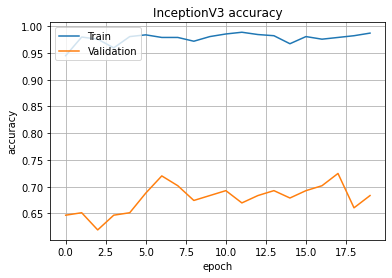

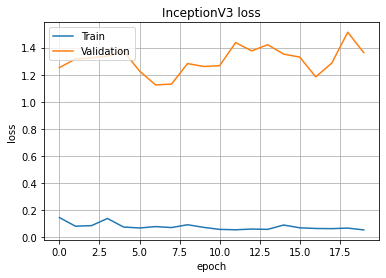

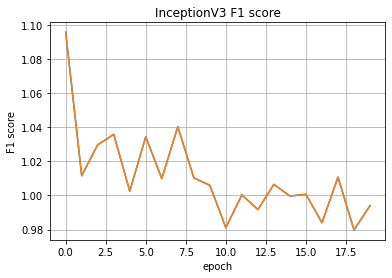

In [52]:
#resultats inceptionV3

# summarize history for accuracy
plt.plot(history_myInceptionV3_2.history['accuracy'])
plt.plot(history_myInceptionV3_2.history['val_accuracy'])
plt.title('InceptionV3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for loss
plt.plot(history_myInceptionV3_2.history['loss'])
plt.plot(history_myInceptionV3_2.history['val_loss'])
plt.title('InceptionV3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# summarize history for F1 score
plt.plot(history_myInceptionV3_2.history['f1_m'])
plt.plot(history_myInceptionV3_2.history['f1_m'])
plt.title('InceptionV3 F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
#plt.legend(['Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [55]:
history_myInceptionV3_3 = myInceptionV3.fit(
    train_datagen.flow(
        x_train, y_train,
        batch_size=128,
        subset='training'),
    validation_data=train_datagen.flow(
        x_train, y_train,
        batch_size=32,
        subset='validation'),
    steps_per_epoch=len(x_train) / 256,
    epochs=20,
    verbose=1)

Epoch 1/20
4/4 [==============================] - 213s 54s/step - loss: 0.0544 - accuracy: 0.9822 - f1_m: 0.9983 - val_loss: 1.3916 - val_accuracy: 0.6927 - val_f1_m: 1.2424
Epoch 2/20
4/4 [==============================] - 261s 70s/step - loss: 0.0526 - accuracy: 0.9870 - f1_m: 0.9996 - val_loss: 1.3261 - val_accuracy: 0.6743 - val_f1_m: 1.2106
Epoch 3/20
4/4 [==============================] - 236s 61s/step - loss: 0.0580 - accuracy: 0.9870 - f1_m: 0.9691 - val_loss: 1.3325 - val_accuracy: 0.6927 - val_f1_m: 1.2483
Epoch 4/20


KeyboardInterrupt: 